In [2]:

%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
cityData = pd.read_csv(city_data_to_load)
rideData = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
rideCity = pd.merge(rideData,cityData,how = "left", on = "city")

# Display the data table for preview
rideCity.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

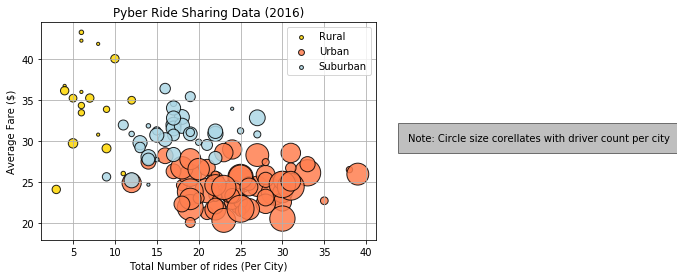

In [8]:
# Obtain the x and y coordinates for each of the three city types
data= rideCity[["type","city","fare","driver_count"]]
pd.options.mode.chained_assignment = None
data["count"] = 1
avgData = data.groupby(["type","city"]).agg({"fare": 'mean', "driver_count":"mean","count":"sum"})
avgData = avgData.reset_index()
rural = avgData.loc[avgData['type'] == 'Rural']
urban = avgData.loc[avgData['type'] == 'Urban']
suburban = avgData.loc[avgData['type'] == 'Suburban']
# Build the scatter plots for each city types
plt.scatter(rural["count"],rural["fare"], s = rural["driver_count"]*10,marker='o',facecolors='gold',edgecolors='black', label = "Rural", alpha = 0.85)
plt.scatter(urban["count"],urban["fare"], s = urban["driver_count"]*10,marker='o',facecolors='coral',edgecolors='black', label = "Urban",alpha = 0.85)
plt.scatter(suburban["count"],suburban["fare"], s = suburban["driver_count"]*10,marker='o',facecolors='lightblue',edgecolors='black', label = "Suburban",alpha = 0.85)
# Incorporate the other graph properties
plt.grid()
plt.xlabel('Total Number of rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')
# Create a legend
lgnd = plt.legend()
lgnd.legendHandles[0]._sizes = [15]
lgnd.legendHandles[1]._sizes = [35]
lgnd.legendHandles[2]._sizes = [15]

# Incorporate a text label regarding circle size
plt.text(45,30,'Note: Circle size corellates with driver count per city', bbox = {'facecolor':'grey','alpha':0.5,'pad':10})
# Save Figure
plt.savefig("BubbleChart.png", bbox_inches="tight")

In [9]:
# Show plot
plt.show()
avgData

,type,city,fare,driver_count,count
0,Rural,Bradshawfurt,40.064000,7,10
1,Rural,Garzaport,24.123333,7,3
2,Rural,Harringtonfort,33.470000,4,6
3,Rural,Jessicaport,36.013333,1,6
4,Rural,Lake Jamie,34.358333,4,6
5,Rural,Lake Latoyabury,26.061818,2,11
6,Rural,Michaelberg,34.997500,6,12
7,Rural,New Ryantown,43.278333,2,6
8,Rural,Newtonview,36.745000,1,4
9,Rural,North Holly,29.130000,8,9


## Total Fares by City Type

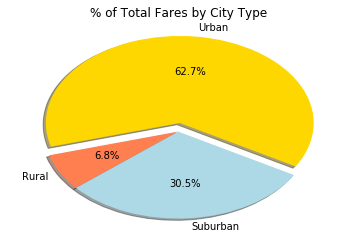

In [5]:
# Calculate Type Percents
fareData = data[['type','fare']].groupby(["type"]).sum()
fareData = fareData.reset_index()
rural = fareData.loc[fareData['type'] == 'Rural']
urban = fareData.loc[fareData['type'] == 'Urban']
suburban = fareData.loc[fareData['type'] == 'Suburban']
urbFare = urban['fare'].sum()
rurFare = rural['fare'].sum()
subFare = suburban['fare'].sum()
# Build Pie Chart
explode = (0.1,0,0)
plt.pie([urbFare,rurFare,subFare],labels=['Urban','Rural','Suburban'], colors= ['gold','coral','lightblue'], explode = explode, autopct="%1.1f%%", shadow=True, startangle=330)
plt.title('% of Total Fares by City Type')
# Save Figure
plt.savefig("fareChart.png")

In [6]:
# Show Figure
plt.show()
avgData

,type,city,fare,driver_count,count
0,Rural,Bradshawfurt,40.064000,7,10
1,Rural,Garzaport,24.123333,7,3
2,Rural,Harringtonfort,33.470000,4,6
3,Rural,Jessicaport,36.013333,1,6
4,Rural,Lake Jamie,34.358333,4,6
5,Rural,Lake Latoyabury,26.061818,2,11
6,Rural,Michaelberg,34.997500,6,12
7,Rural,New Ryantown,43.278333,2,6
8,Rural,Newtonview,36.745000,1,4
9,Rural,North Holly,29.130000,8,9


## Total Rides by City Type

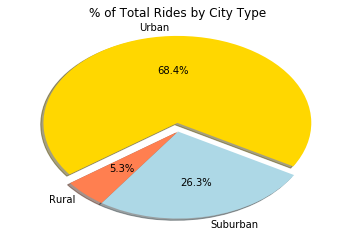

In [223]:
# Calculate Ride Percents
countData = data[['type','count']].groupby(["type"]).sum()
countData = countData.reset_index()
rural = countData.loc[countData['type'] == 'Rural']
urban = countData.loc[countData['type'] == 'Urban']
suburban = countData.loc[countData['type'] == 'Suburban']
urbCount = urban['count'].sum()
rurCount = rural['count'].sum()
subCount = suburban['count'].sum()
# Build Pie Chart
plt.pie([urbCount,rurCount,subCount],labels=['Urban','Rural','Suburban'], colors= ['gold','coral','lightblue'],explode = explode, autopct="%1.1f%%", shadow=True, startangle=330)
plt.title('% of Total Rides by City Type')
# Save Figure
plt.savefig("countChart.png")

In [205]:
# Show Figure
plt.show()

## Total Drivers by City Type

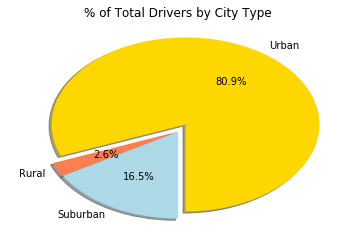

In [224]:
# Calculate Ride Percents
driverData = cityData[['type','driver_count']]
driverData = driverData.groupby(["type"]).sum()
driverData = driverData.reset_index()
rural = driverData.loc[driverData['type'] == 'Rural']
urban = driverData.loc[driverData['type'] == 'Urban']
suburban = driverData.loc[driverData['type'] == 'Suburban']
urbDrivers = urban['driver_count'].sum()
rurDrivers = rural['driver_count'].sum()
subDrivers = suburban['driver_count'].sum()
# Build Pie Chart
plt.pie([urbDrivers,rurDrivers,subDrivers],labels=['Urban','Rural','Suburban'], colors= ['gold','coral','lightblue'], explode = explode ,autopct="%1.1f%%", shadow=True, startangle=270)
plt.title('% of Total Drivers by City Type')
# Save Figure
plt.savefig("driverChart.png")


In [207]:
# Show Figure
plt.show()